In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import permutation_importance
#import shap

## Lectura de Datasets

### Academico Dataset

In [200]:
dataset = 'academico_pdl'
file = f'../data/{dataset}.csv'
df_academico = pd.read_csv(file)

In [201]:
df_academico.columns

Index(['periodo', 'id_part_grado', 'participante', 'ruralidad', 'Comunicación',
       'Matemática', 'nivel_de_logro_aca'],
      dtype='object')

In [202]:
df_academico['id_part_grado'].nunique()

370

In [203]:
df_academico.shape

(959, 7)

### Clima de Aula Dataset

In [204]:
dataset = 'clima_aula_pdl'
file = f'../data/{dataset}.csv'
df_clima_aula = pd.read_csv(file)

In [205]:
df_clima_aula.columns

Index(['periodo', 'id_part_grado', 'participante', 'ruralidad',
       'Aprendizaje completamente interiorizado',
       'Comprensión comprobada y asegurada',
       'Expectativas rigurosas mantenidas',
       'Se crea una cultura positiva y un entorno de aprendizaje',
       'Se establece un entorno de aprendizaje atractivo',
       'Se fomentan relaciones alentadoras y de apoyo',
       'Se valoran los aportes y las ideas de los estudiantes'],
      dtype='object')

In [206]:
df_clima_aula['id_part_grado'].nunique()

427

In [207]:
df_clima_aula.shape

(1105, 11)

### Socio-emocional Dataset

In [208]:
dataset = 'socioemocional_pdl'
file = f'../data/{dataset}.csv'
df_socioemocional = pd.read_csv(file)

In [209]:
df_socioemocional.columns

Index(['periodo', 'id_part_grado', 'participante', 'ruralidad',
       'Ausentismo y deserción escolar', 'Autoconcepto', 'Autocuidado',
       'Autoestima', 'Comportamiento prosocial', 'Comunicación asertiva',
       'Conciencia emocional', 'Conciencia social',
       'Consumo de alcohol y drogas', 'Creatividad',
       'Desinformación sobre educación sexual integral', 'Empatía',
       'Entorno de riesgo', 'Limitada expectativa sobre la educación',
       'Limitados recursos económicos', 'Regulación emocional',
       'Resolución de conflictos', 'Toma de decisiones responsables',
       'Trabajo adolescente', 'Trabajo en equipo', 'Violencia escolar',
       'Violencia familiar'],
      dtype='object')

In [210]:
df_socioemocional['id_part_grado'].nunique()

389

In [211]:
df_socioemocional.shape

(970, 26)

## Agrupamiento y Transformación de Datos

ACADEMICO - Eliminar registros con valores nulos en esos 3 Primary keys

In [212]:
df_academico.isnull().sum()

periodo                 0
id_part_grado           0
participante            0
ruralidad               0
Comunicación            0
Matemática              0
nivel_de_logro_aca    294
dtype: int64

In [213]:
df_socioemocional.isnull().sum()

periodo                                           0
id_part_grado                                     0
participante                                      0
ruralidad                                         0
Ausentismo y deserción escolar                    0
Autoconcepto                                      0
Autocuidado                                       0
Autoestima                                        0
Comportamiento prosocial                          0
Comunicación asertiva                             0
Conciencia emocional                              0
Conciencia social                                 0
Consumo de alcohol y drogas                       0
Creatividad                                       0
Desinformación sobre educación sexual integral    0
Empatía                                           0
Entorno de riesgo                                 0
Limitada expectativa sobre la educación           0
Limitados recursos económicos                     0
Regulación e

In [214]:
df_clima_aula.isnull().sum()

periodo                                                     0
id_part_grado                                               0
participante                                                0
ruralidad                                                   0
Aprendizaje completamente interiorizado                     0
Comprensión comprobada y asegurada                          0
Expectativas rigurosas mantenidas                           0
Se crea una cultura positiva y un entorno de aprendizaje    0
Se establece un entorno de aprendizaje atractivo            0
Se fomentan relaciones alentadoras y de apoyo               0
Se valoran los aportes y las ideas de los estudiantes       0
dtype: int64

ACADEMICO - Agrupar por las siguientes columnas y tomar la moda de la variable `Nivel de logro`

In [215]:
# import locale

# # Set locale for Spanish month names
# locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')

# # Ensure 'periodo' is a string and then attempt conversion to datetime
# df_evaluaciones['periodo'] = pd.to_datetime(df_evaluaciones['periodo'], errors='coerce')

# # Apply transformation only to valid datetime values
# df_evaluaciones.loc[df_evaluaciones['periodo'].notna(), 'periodo'] = (
#     df_evaluaciones['periodo'].dt.strftime('%B %Y').str.capitalize()
# )

# df_evaluaciones['periodo'].unique()

## Cruce de Tablas

Cruce por "ID_Part_Grado" y "Periodo"

In [216]:
df_merged = pd.merge(
    df_academico,
    df_socioemocional[['id_part_grado', 'periodo', 'Ausentismo y deserción escolar', 'Autoconcepto', 'Autocuidado',
       'Autoestima', 'Comportamiento prosocial', 'Comunicación asertiva',
       'Conciencia emocional', 'Conciencia social',
       'Consumo de alcohol y drogas', 'Creatividad',
       'Desinformación sobre educación sexual integral', 'Empatía',
       'Entorno de riesgo', 'Limitada expectativa sobre la educación',
       'Limitados recursos económicos', 'Regulación emocional',
       'Resolución de conflictos', 'Toma de decisiones responsables',
       'Trabajo adolescente', 'Trabajo en equipo', 'Violencia escolar',
       'Violencia familiar']],
    on=['id_part_grado', 'periodo'],
    how='left'
)
df_final = pd.merge(
    df_merged,
    df_clima_aula[['id_part_grado', 'periodo', 'Aprendizaje completamente interiorizado',
       'Comprensión comprobada y asegurada',
       'Expectativas rigurosas mantenidas',
       'Se crea una cultura positiva y un entorno de aprendizaje',
       'Se establece un entorno de aprendizaje atractivo',
       'Se fomentan relaciones alentadoras y de apoyo',
       'Se valoran los aportes y las ideas de los estudiantes']],
    on=['id_part_grado', 'periodo'],
    how='left'
)

df_final.head()

,periodo,id_part_grado,participante,ruralidad,Comunicación,Matemática,nivel_de_logro_aca,Ausentismo y deserción escolar,Autoconcepto,Autocuidado,...,Trabajo en equipo,Violencia escolar,Violencia familiar,Aprendizaje completamente interiorizado,Comprensión comprobada y asegurada,Expectativas rigurosas mantenidas,Se crea una cultura positiva y un entorno de aprendizaje,Se establece un entorno de aprendizaje atractivo,Se fomentan relaciones alentadoras y de apoyo,Se valoran los aportes y las ideas de los estudiantes
0,Diciembre 2023,017196bd-Pri-3ero,"BOniON MENDOZA, TEODOCIA",Urbana,1,1,2.5,0.0,0.0,5.0,...,0.0,0.0,0.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0
1,Diciembre 2023,0172b301-Pri-6xto,"YUPANQUI QUISPE, ANDREA INÉS",Rural,1,1,2.5,0.0,5.0,5.0,...,5.0,0.0,0.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0
2,Diciembre 2023,0172b3c6-Pri-2ndo,"REQUEJO GOICOCHEA, OSCAR GIANCARLO",Rural,1,1,3.0,0.0,0.0,5.0,...,0.0,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,Diciembre 2023,0172b653-Pri-6xto,"RAMOS ESTRADA, AMILTHON",Rural,1,1,2.5,0.0,5.0,5.0,...,3.0,0.0,0.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0
4,Diciembre 2023,0172b72d-Sec-1ero,"TRIGOSO SANTILLAN, PERCY ALY",Urbana,0,0,NaN,4.0,5.0,5.0,...,3.0,4.0,4.0,3.0,3.0,3.0,1.0,2.0,3.0,3.0


In [217]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 36 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   periodo                                                   959 non-null    object 
 1   id_part_grado                                             959 non-null    object 
 2   participante                                              959 non-null    object 
 3   ruralidad                                                 959 non-null    object 
 4   Comunicación                                              959 non-null    int64  
 5   Matemática                                                959 non-null    int64  
 6   nivel_de_logro_aca                                        665 non-null    float64
 7   Ausentismo y deserción escolar                            770 non-null    float64
 8   Autoconcepto        

## Datos Programa PDL

In [218]:
data_pdl = pd.read_csv('..\\data\\data_pdl_.csv')

In [219]:
data_pdl.columns

Index(['periodo', 'id_participante', 'participante', 'ruralidad', 'C1 y C2',
       'C3', 'C4'],
      dtype='object')

In [220]:
data_pdl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   periodo          682 non-null    object 
 1   id_participante  682 non-null    object 
 2   participante     682 non-null    object 
 3   ruralidad        682 non-null    object 
 4   C1 y C2          682 non-null    float64
 5   C3               674 non-null    float64
 6   C4               669 non-null    float64
dtypes: float64(3), object(4)
memory usage: 37.4+ KB


In [221]:
data_pdl.sample(10)

,periodo,id_participante,participante,ruralidad,C1 y C2,C3,C4
504,Marzo 2023,b29b0a72,"MANCILLA HURTADO, URSULA LISSET",Urbana,2.25,2.5,1.5
590,Marzo 2024,64acd3baeff0d9f0290fa95a,"BULLÓN GUZMÁN, MARÍA YOLANDA",Rural,1.50,2.0,2.0
252,Julio 2023,b29b2d4b,"YLLA QUENAYA, CARLOS JAVIER",Urbana,2.50,3.0,3.5
216,Julio 2023,0173d2ce,"YAURI RIVERA, ANDERSON",Rural,2.50,2.5,3.0
364,Julio 2024,b29b3a182024,"HUACHACA PEZUA, BLANCA INES",Rural,2.00,3.0,3.0
376,Julio 2024,b29b46172024,"UBILLUS TORRES, LORENZO",Rural,3.00,3.0,3.0
482,Marzo 2023,0173ce47,"URQUIZA RODRIGUEZ, LILIANA ELIZABETH",Rural,3.50,4.0,1.0
537,Marzo 2023,b29b3e4f,"LOBATON FLORES, CADY EYTABEL",Urbana,2.50,2.5,1.0
23,Diciembre 2023,b29b6f91,"TELLO MAYTAHUARI, JIMENA DEL PILAR",Rural,2.25,2.5,1.5
371,Julio 2024,b29b3f662024,"CALIZAYA CALIZAYA, JENNY ALESSANDRA",Rural,2.00,3.0,3.0


In [222]:
# List of specific 'grado' values
grado_values = [
    'Pri-6xto', 'Pri-1ero', 'Pri-2ndo', 'Pri-3ero', 'Pri-5nto', 'Pri-4rto',
    'Sec-3ero', 'Sec-4rto', 'Sec-1ero', 'Sec-2ndo', 'Sec-5nto'
]

# Step 1: Extract 'id_participante' and 'grado' using the specific 'grado' values
def extract_id_and_grado(row):
    for grado in grado_values:
        if grado in row:
            id_participante = row.replace(f'-{grado}', '')
            return id_participante, grado
    return None, None  # Handle cases where no match is found

# Apply the function to extract 'id_participante' and 'grado'
df_final[['id_participante', 'grado']] = df_final['id_part_grado'].apply(extract_id_and_grado).apply(pd.Series)

# Convert 'id_participante' to integer for merging
#df_final['id_participante'] = df1['id_participante'].astype(int)

# Step 2: Merge with the second dataset on 'id_participante'
# Use a left merge to ensure no rows are lost from df1
merged_df = pd.merge(df_final, data_pdl[[ 'id_participante', 'periodo', 'C1 y C2', 'C3', 'C4']], on=['id_participante', 'periodo'], how='left')

# Step 3: Recover the original 'id_part_grado' column
merged_df['id_part_grado'] = df_final['id_part_grado']

# Step 4: Drop the temporary split columns if no longer needed
merged_df = merged_df.drop(columns=['id_participante', 'grado'])


In [223]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 39 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   periodo                                                   959 non-null    object 
 1   id_part_grado                                             959 non-null    object 
 2   participante                                              959 non-null    object 
 3   ruralidad                                                 959 non-null    object 
 4   Comunicación                                              959 non-null    int64  
 5   Matemática                                                959 non-null    int64  
 6   nivel_de_logro_aca                                        665 non-null    float64
 7   Ausentismo y deserción escolar                            770 non-null    float64
 8   Autoconcepto        

In [224]:
merged_df.head()

,periodo,id_part_grado,participante,ruralidad,Comunicación,Matemática,nivel_de_logro_aca,Ausentismo y deserción escolar,Autoconcepto,Autocuidado,...,Aprendizaje completamente interiorizado,Comprensión comprobada y asegurada,Expectativas rigurosas mantenidas,Se crea una cultura positiva y un entorno de aprendizaje,Se establece un entorno de aprendizaje atractivo,Se fomentan relaciones alentadoras y de apoyo,Se valoran los aportes y las ideas de los estudiantes,C1 y C2,C3,C4
0,Diciembre 2023,017196bd-Pri-3ero,"BOniON MENDOZA, TEODOCIA",Urbana,1,1,2.5,0.0,0.0,5.0,...,3.0,3.0,2.0,2.0,3.0,3.0,3.0,NaN,NaN,NaN
1,Diciembre 2023,0172b301-Pri-6xto,"YUPANQUI QUISPE, ANDREA INÉS",Rural,1,1,2.5,0.0,5.0,5.0,...,3.0,3.0,1.0,2.0,3.0,3.0,3.0,NaN,NaN,NaN
2,Diciembre 2023,0172b3c6-Pri-2ndo,"REQUEJO GOICOCHEA, OSCAR GIANCARLO",Rural,1,1,3.0,0.0,0.0,5.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN
3,Diciembre 2023,0172b653-Pri-6xto,"RAMOS ESTRADA, AMILTHON",Rural,1,1,2.5,0.0,5.0,5.0,...,3.0,3.0,1.0,2.0,3.0,3.0,3.0,NaN,NaN,NaN
4,Diciembre 2023,0172b72d-Sec-1ero,"TRIGOSO SANTILLAN, PERCY ALY",Urbana,0,0,NaN,4.0,5.0,5.0,...,3.0,3.0,3.0,1.0,2.0,3.0,3.0,NaN,NaN,NaN


Casteamos columnas a string

In [225]:
# merged_df = merged_df.astype({col: str for col in merged_df.select_dtypes(include=['int64', 'float64']).columns})

In [226]:
merged_df.dtypes

periodo                                                      object
id_part_grado                                                object
participante                                                 object
ruralidad                                                    object
Comunicación                                                  int64
Matemática                                                    int64
nivel_de_logro_aca                                          float64
Ausentismo y deserción escolar                              float64
Autoconcepto                                                float64
Autocuidado                                                 float64
Autoestima                                                  float64
Comportamiento prosocial                                    float64
Comunicación asertiva                                       float64
Conciencia emocional                                        float64
Conciencia social                               

In [227]:
merged_df.shape

(959, 39)

In [228]:
# for col in merged_df.columns:
#     if col.endswith('_x'):
#         col_y = col.replace('_x', '_y')
#         if merged_df[col].equals(merged_df[col_y]):
#             merged_df.drop([col_y], axis=1, inplace=True)
#             merged_df = merged_df.rename(columns={col: col[:-2] })

# merged_df.head()

In [229]:
# Calcular el porcentaje de valores nulos por columna
null_percentage = (merged_df.isnull().sum() / merged_df.shape[0]) * 100

# Filtrar columnas con menos del 70% de valores nulos
merged_df = merged_df.loc[:, null_percentage < 70]

# Mostrar las columnas restantes
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 39 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   periodo                                                   959 non-null    object 
 1   id_part_grado                                             959 non-null    object 
 2   participante                                              959 non-null    object 
 3   ruralidad                                                 959 non-null    object 
 4   Comunicación                                              959 non-null    int64  
 5   Matemática                                                959 non-null    int64  
 6   nivel_de_logro_aca                                        665 non-null    float64
 7   Ausentismo y deserción escolar                            770 non-null    float64
 8   Autoconcepto        

In [230]:
# Eliminar columnas duplicadas basándose en el contenido
merged_df = merged_df.loc[:, ~merged_df.T.duplicated()]
merged_df.shape

(959, 39)

In [231]:
merged_df.periodo.unique()

array(['Diciembre 2023', 'Diciembre 2024', 'Julio 2023', 'Julio 2024',
       'Marzo 2023', 'Marzo 2024'], dtype=object)

In [232]:
merged_df['nivel_de_logro_aca'].unique()

array([2.5, 3. , nan, 2. , 1. , 1.5])

In [233]:
merged_df.id_part_grado.nunique()

370

In [234]:
def complete_participant_evaluations(df, habilidad_columns):
    """
    Ensures each participant has evaluations for all six defined periods 
    and fills missing 'habilidad' values using forward and backward fill.

    Parameters:
    df (pd.DataFrame): The input dataset with 'id_participante', 'periodo', and habilidad columns.
    habilidad_columns (list): List of habilidad columns to fill.

    Returns:
    pd.DataFrame: The completed dataset with no missing participant-period records.
    """

    # Define the six fixed periods in chronological order
    fixed_periods = ['Marzo 2023', 'Julio 2023', 'Diciembre 2023', 'Marzo 2024', 'Julio 2024', 'Diciembre 2024']

    # Get unique participants
    participants = df['id_part_grado'].unique()

    # Create a complete grid of (id_participante, periodo)
    full_grid = pd.MultiIndex.from_product([participants, fixed_periods], names=['id_part_grado', 'periodo'])
    full_df = pd.DataFrame(index=full_grid).reset_index()

    # Merge with the original dataset
    df_complete = full_df.merge(df, on=['id_part_grado', 'periodo'], how='left')

    # Sort by participant and period (ensuring chronological order)
    df_complete['periodo'] = pd.Categorical(df_complete['periodo'], categories=fixed_periods, ordered=True)
    df_complete = df_complete.sort_values(by=['id_part_grado', 'periodo'])

    # Apply forward then backward fill for habilidad columns
    df_complete[habilidad_columns] = df_complete.groupby('id_part_grado')[habilidad_columns].ffill().bfill()

    return df_complete

In [235]:
habilidad_cols = merged_df.columns

df_filled = complete_participant_evaluations(merged_df, habilidad_cols)

In [236]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2220 entries, 0 to 1841
Data columns (total 39 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   id_part_grado                                             2220 non-null   object  
 1   periodo                                                   2220 non-null   category
 2   participante                                              2220 non-null   object  
 3   ruralidad                                                 2220 non-null   object  
 4   Comunicación                                              2220 non-null   float64 
 5   Matemática                                                2220 non-null   float64 
 6   nivel_de_logro_aca                                        2220 non-null   float64 
 7   Ausentismo y deserción escolar                            2220 non-null   float64 
 8   Autoconcepto 

## Lead en Target

In [237]:
df_filled['nivel_de_logro_futuro'] = df_filled.groupby(['id_part_grado'])['nivel_de_logro_aca'].shift(-1)

In [238]:
df_filled.head()

,id_part_grado,periodo,participante,ruralidad,Comunicación,Matemática,nivel_de_logro_aca,Ausentismo y deserción escolar,Autoconcepto,Autocuidado,...,Comprensión comprobada y asegurada,Expectativas rigurosas mantenidas,Se crea una cultura positiva y un entorno de aprendizaje,Se establece un entorno de aprendizaje atractivo,Se fomentan relaciones alentadoras y de apoyo,Se valoran los aportes y las ideas de los estudiantes,C1 y C2,C3,C4,nivel_de_logro_futuro
0,017196bd-Pri-3ero,Marzo 2023,"BOniON MENDOZA, TEODOCIA",Urbana,1.0,1.0,1.5,0.0,0.0,5.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,0.5,2.0
1,017196bd-Pri-3ero,Julio 2023,"BOniON MENDOZA, TEODOCIA",Urbana,1.0,1.0,2.0,0.0,0.0,5.0,...,2.0,2.0,2.0,3.0,2.0,2.0,2.25,2.0,0.5,2.5
2,017196bd-Pri-3ero,Diciembre 2023,"BOniON MENDOZA, TEODOCIA",Urbana,1.0,1.0,2.5,0.0,0.0,5.0,...,3.0,2.0,2.0,3.0,3.0,3.0,2.25,2.0,0.5,2.5
3,017196bd-Pri-3ero,Marzo 2024,"BOniON MENDOZA, TEODOCIA",Urbana,1.0,1.0,2.5,0.0,0.0,5.0,...,3.0,2.0,2.0,3.0,3.0,3.0,2.25,2.0,0.5,2.5
4,017196bd-Pri-3ero,Julio 2024,"BOniON MENDOZA, TEODOCIA",Urbana,1.0,1.0,2.5,0.0,0.0,5.0,...,3.0,2.0,2.0,3.0,3.0,3.0,2.25,2.0,0.5,2.5


### Preprocessing

In [239]:
df = df_filled.copy()

In [240]:
bins = [1, 2, 2.5, 3]
labels = [1, 2, 3]

df['nivel_de_logro_aca'] = pd.cut(
    df['nivel_de_logro_aca'],
    bins=bins,
    labels=labels,
    right=False
).astype('float64')
df['nivel_de_logro_aca'].unique()

array([ 1.,  2.,  3., nan])

In [241]:
bins = [1, 2, 2.5, 3]
labels = [1, 2, 3]

df['nivel_de_logro_futuro'] = pd.cut(
    df['nivel_de_logro_futuro'],
    bins=bins,
    labels=labels,
    right=False
).astype('float64')

df['nivel_de_logro_futuro'].unique()

array([ 2.,  3., nan,  1.])

In [242]:
nivel_mapping = {'Marzo 2023': 0, 'Julio 2023': 1, 'Diciembre 2023': 2, 'Marzo 2024': 3, 'Julio 2024': 4, 'Diciembre 2024': 5}
df['periodo'] = df['periodo'].map(nivel_mapping).astype('Int64')

In [243]:
target_distribution = df['nivel_de_logro_futuro'].value_counts()

In [244]:
print("Target Distribution (Original):")
print(target_distribution)

Target Distribution (Original):
nivel_de_logro_futuro
1.0    601
2.0    562
3.0    199
Name: count, dtype: int64


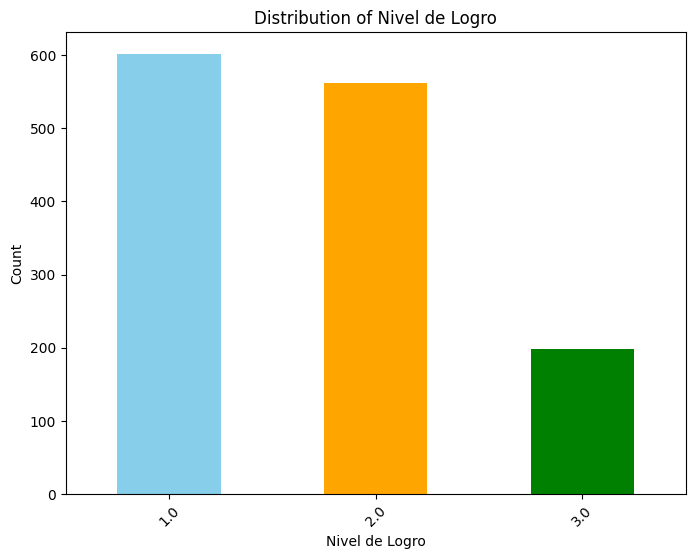

In [245]:
plt.figure(figsize=(8, 6))
target_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Distribution of Nivel de Logro")
plt.xlabel("Nivel de Logro")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [246]:
from sklearn.preprocessing import LabelEncoder

In [247]:
df.dtypes

id_part_grado                                                object
periodo                                                       Int64
participante                                                 object
ruralidad                                                    object
Comunicación                                                float64
Matemática                                                  float64
nivel_de_logro_aca                                          float64
Ausentismo y deserción escolar                              float64
Autoconcepto                                                float64
Autocuidado                                                 float64
Autoestima                                                  float64
Comportamiento prosocial                                    float64
Comunicación asertiva                                       float64
Conciencia emocional                                        float64
Conciencia social                               

In [248]:
categorical_columns = df.select_dtypes(include=['object']).columns.difference(['periodo', 'nivel_de_logro', 'nivel_de_logro_futuro'])

label_encoders = {}  
for col in categorical_columns:
    le = LabelEncoder()
    
    df[col] = df[col].fillna('-1')
    
    df[col] = le.fit_transform(df[col])
    
    label_encoders[col] = le

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2220 entries, 0 to 1841
Data columns (total 40 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   id_part_grado                                             2220 non-null   int64  
 1   periodo                                                   2220 non-null   Int64  
 2   participante                                              2220 non-null   int64  
 3   ruralidad                                                 2220 non-null   int64  
 4   Comunicación                                              2220 non-null   float64
 5   Matemática                                                2220 non-null   float64
 6   nivel_de_logro_aca                                        1663 non-null   float64
 7   Ausentismo y deserción escolar                            2220 non-null   float64
 8   Autoconcepto           

In [253]:
df_corr = df.drop(['nivel_de_logro_aca', 'periodo', 'id_part_grado' ], axis=1)

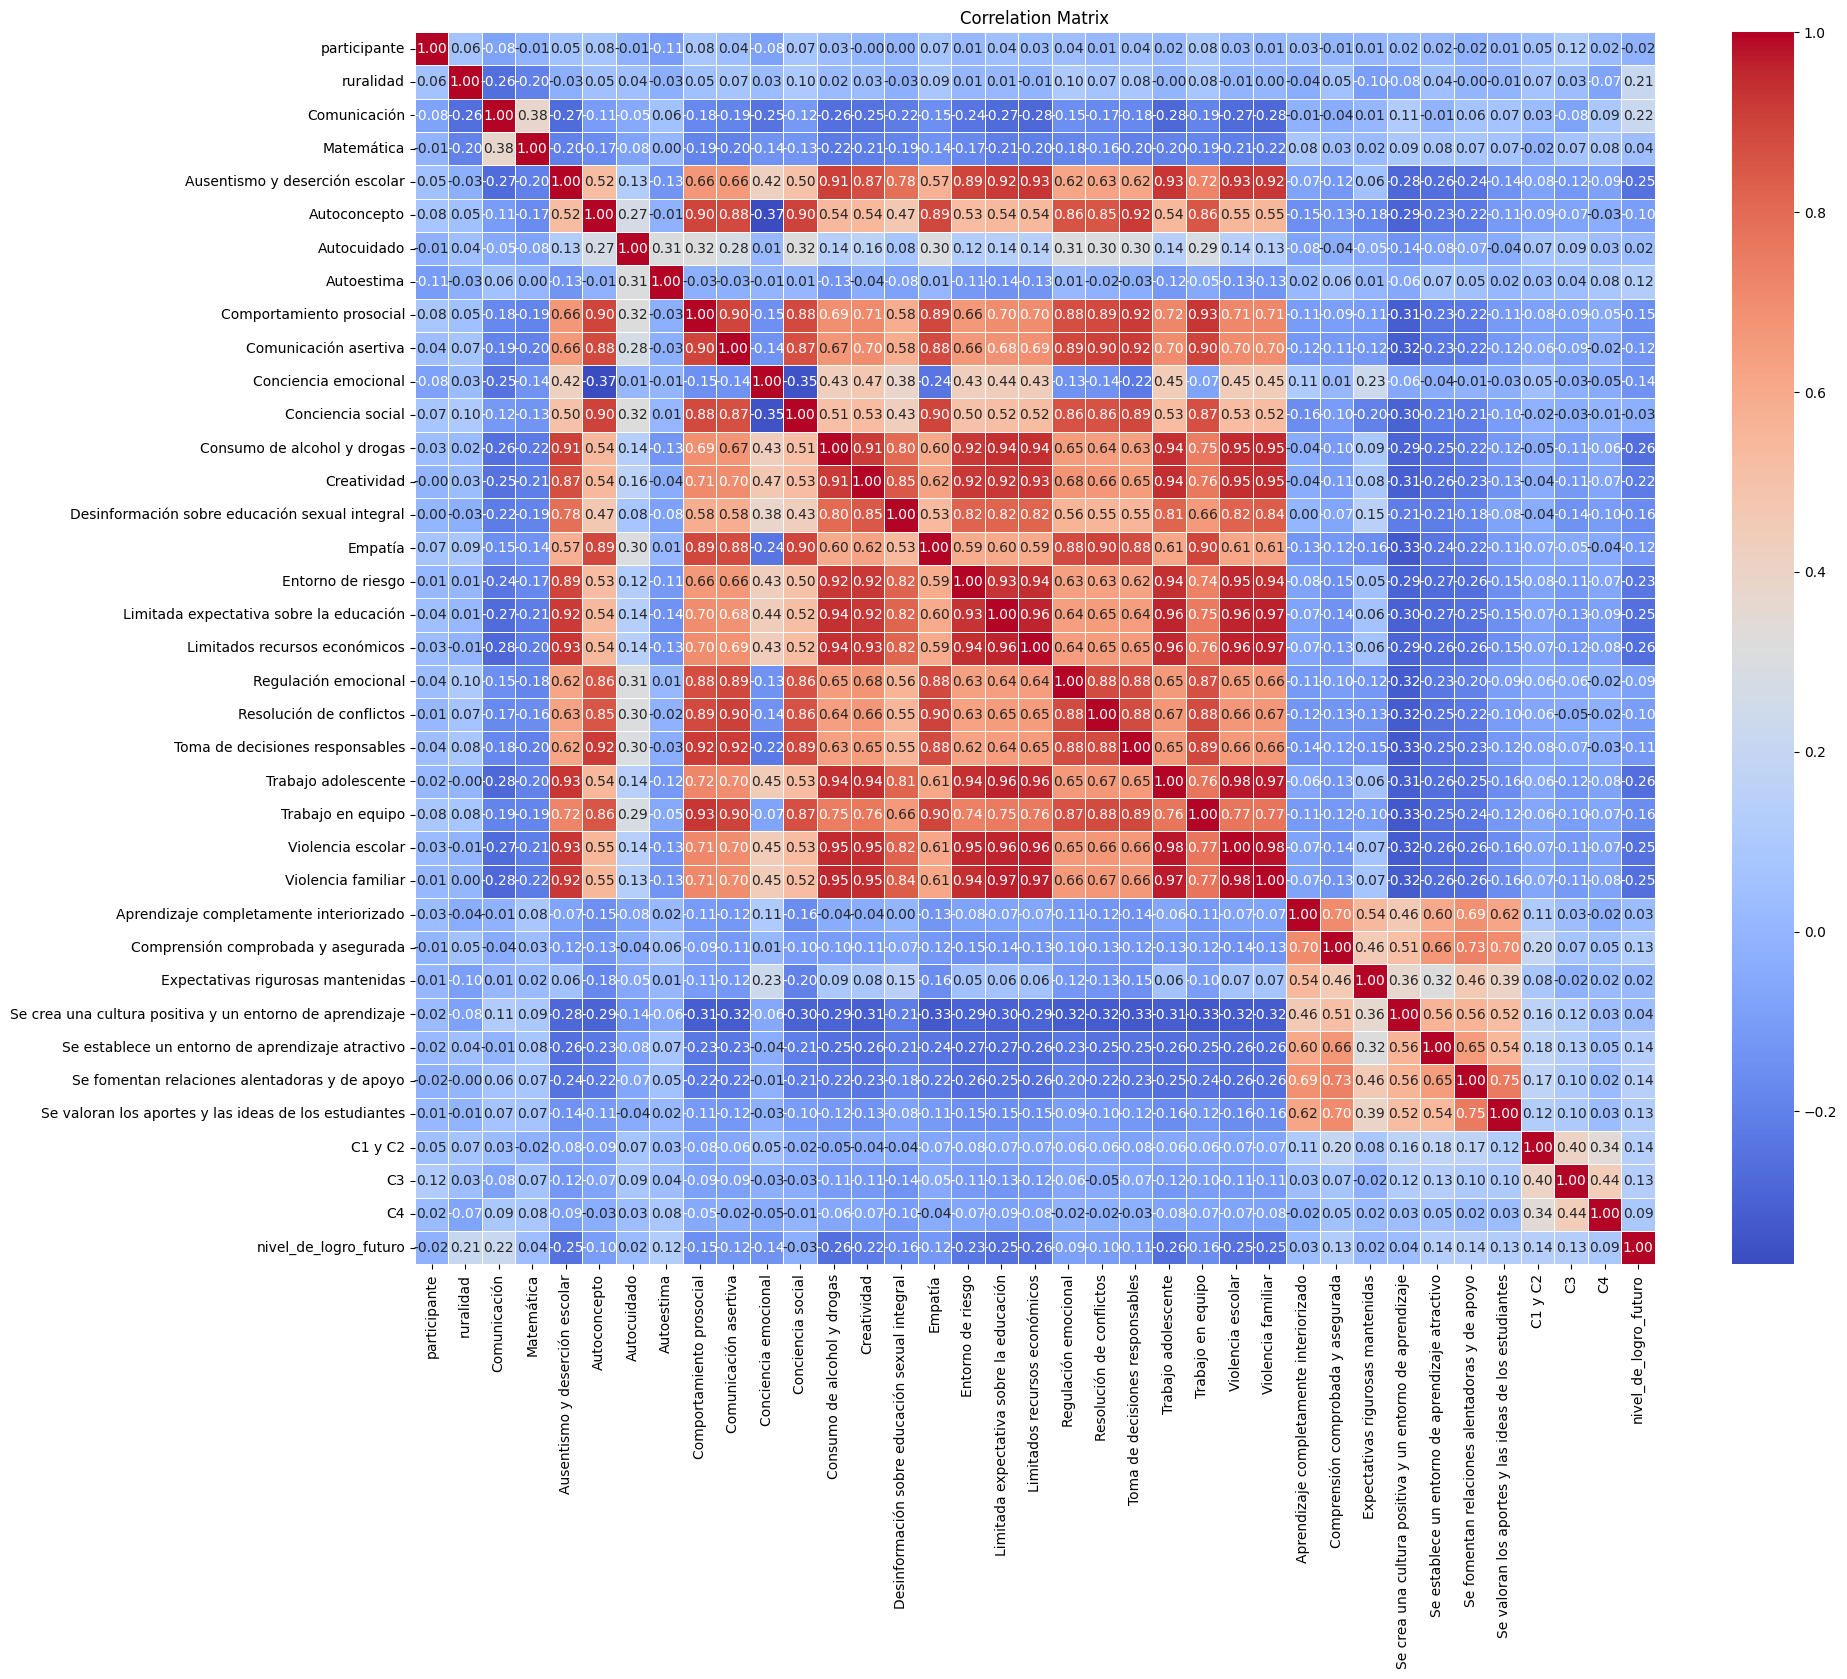

In [255]:

import seaborn as sns
import scipy.stats as stats

# Compute correlation matrix
correlation_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [256]:
df.isnull().sum()

id_part_grado                                                 0
periodo                                                       0
participante                                                  0
ruralidad                                                     0
Comunicación                                                  0
Matemática                                                    0
nivel_de_logro_aca                                          557
Ausentismo y deserción escolar                                0
Autoconcepto                                                  0
Autocuidado                                                   0
Autoestima                                                    0
Comportamiento prosocial                                      0
Comunicación asertiva                                         0
Conciencia emocional                                          0
Conciencia social                                             0
Consumo de alcohol y drogas             

In [257]:
df_final = df.dropna()
df_final.shape

(1346, 40)

### Modelling

In [258]:
df_final.columns

Index(['id_part_grado', 'periodo', 'participante', 'ruralidad', 'Comunicación',
       'Matemática', 'nivel_de_logro_aca', 'Ausentismo y deserción escolar',
       'Autoconcepto', 'Autocuidado', 'Autoestima', 'Comportamiento prosocial',
       'Comunicación asertiva', 'Conciencia emocional', 'Conciencia social',
       'Consumo de alcohol y drogas', 'Creatividad',
       'Desinformación sobre educación sexual integral', 'Empatía',
       'Entorno de riesgo', 'Limitada expectativa sobre la educación',
       'Limitados recursos económicos', 'Regulación emocional',
       'Resolución de conflictos', 'Toma de decisiones responsables',
       'Trabajo adolescente', 'Trabajo en equipo', 'Violencia escolar',
       'Violencia familiar', 'Aprendizaje completamente interiorizado',
       'Comprensión comprobada y asegurada',
       'Expectativas rigurosas mantenidas',
       'Se crea una cultura positiva y un entorno de aprendizaje',
       'Se establece un entorno de aprendizaje atractivo',
 

Por agregar indice de fechas
Eliminar Primary keys de tablas, indices de escuela o region (se podria agrupar por regiones de calor, frio y Lima)
Esperar por la data demografica de alumnos o escuela
Esperar por la historia de 2024

In [259]:
unique_periods = sorted(df_final['periodo'].unique())  # Ensure sorted order
train_periods = unique_periods[:-1]  # Use all except the last one for training
test_periods = unique_periods[-1:]   # Use the last period for testing


In [260]:
# Train set: only includes data from the selected train periods
train_df = df_final[df_final['periodo'].isin(train_periods)]

# Test set: only includes data from the selected test periods
test_df = df_final[df_final['periodo'].isin(test_periods)]


In [261]:
print("Train Periods:", train_periods)
print("Test Periods:", test_periods)
print("Train Size:", train_df.shape[0])
print("Test Size:", test_df.shape[0])

Train Periods: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Test Periods: [np.int64(4)]
Train Size: 1093
Test Size: 253


In [270]:
# Define features (X) and target (y)
X_train = train_df.drop(columns=['periodo', 'participante', 'nivel_de_logro_aca', 'nivel_de_logro_futuro', 'id_part_grado'])
y_train = train_df['nivel_de_logro_futuro']

X_test = test_df.drop(columns=['periodo', 'participante', 'nivel_de_logro_aca', 'nivel_de_logro_futuro', 'id_part_grado'])
y_test = test_df['nivel_de_logro_futuro']

In [271]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [272]:
y_pred = dt_model.predict(X_test)

In [273]:
from sklearn.metrics import accuracy_score
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6640


Classification Report:
               precision    recall  f1-score   support

         1.0       0.62      0.76      0.68       101
         2.0       0.70      0.66      0.68       110
         3.0       0.72      0.43      0.54        42

    accuracy                           0.66       253
   macro avg       0.68      0.62      0.63       253
weighted avg       0.67      0.66      0.66       253



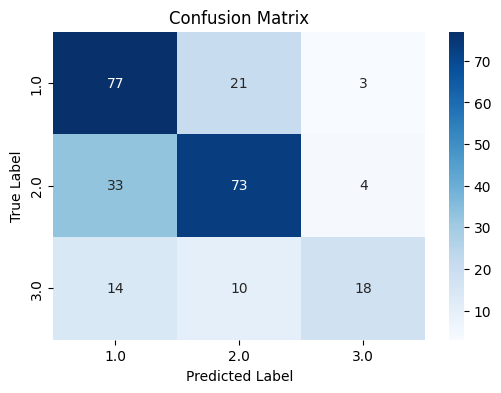

In [274]:
from sklearn.metrics import classification_report, confusion_matrix

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [275]:
# Extract feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Use the feature names from your dataset
    'Importance': dt_model.feature_importances_
})

# Sort by importance (descending)
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)


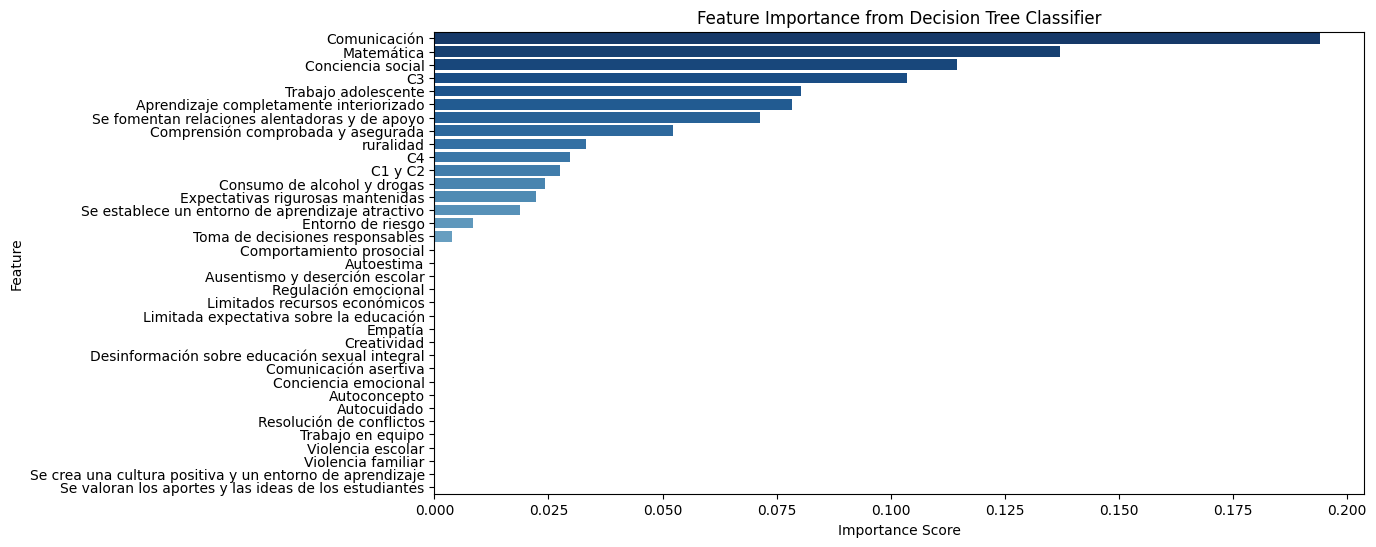

In [276]:
# Plot Feature Importance correctly
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance['Importance'], 
            y=feature_importance['Feature'], 
            hue=feature_importance['Feature'],  # Assign hue
            palette="Blues_r", 
            legend=False)  # Disable legend

plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance from Decision Tree Classifier")
plt.show()

In [277]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6996
Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.67      0.85      0.75       101
         2.0       0.71      0.75      0.73       110
         3.0       1.00      0.21      0.35        42

    accuracy                           0.70       253
   macro avg       0.79      0.60      0.61       253
weighted avg       0.74      0.70      0.67       253



In [282]:
from xgboost import XGBClassifier

# Re-map the target variable to start from 0
y_train_remapped = y_train - 1
y_test_remapped = y_test - 1

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Fit the model on the re-mapped target variable
xgb_model.fit(X_train, y_train_remapped)

# Make predictions
y_pred_xgb_remapped = xgb_model.predict(X_test)

# Re-map predictions back to original labels
y_pred_xgb = y_pred_xgb_remapped + 1

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy:.4f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8814
XGBoost Classification Report:
              precision    recall  f1-score   support

         1.0       0.86      0.93      0.90       101
         2.0       0.86      0.86      0.86       110
         3.0       1.00      0.81      0.89        42

    accuracy                           0.88       253
   macro avg       0.91      0.87      0.88       253
weighted avg       0.89      0.88      0.88       253



d:\Usuarios\ir75854603\Documents\breit-project\breit-project\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:10:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [285]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Re-map y_test to start from 0 (required for label_binarize)
y_test_remapped = y_test - 1

# Define the unique class labels (after re-mapping)
classes = [0, 1, 2]

# Convert multi-class labels into binary format (One-vs-Rest)
y_test_binarized = label_binarize(y_test_remapped, classes=classes)

# Get predicted probabilities for all classes
y_probs_multi = xgb_model.predict_proba(X_test)  # Shape (n_samples, n_classes)

# Compute AUC for each class
auc_scores = roc_auc_score(y_test_binarized, y_probs_multi, average=None, multi_class="ovr")
print(f"AUC-ROC Scores for Each Class: {auc_scores}")

# Compute macro-average AUC-ROC score
macro_auc = roc_auc_score(y_test_binarized, y_probs_multi, average="macro", multi_class="ovr")
print(f"Macro-Average AUC-ROC Score: {macro_auc:.4f}")

# Plot ROC curves for each

AUC-ROC Scores for Each Class: [0.94743356 0.94119517 0.99582487]
Macro-Average AUC-ROC Score: 0.9615


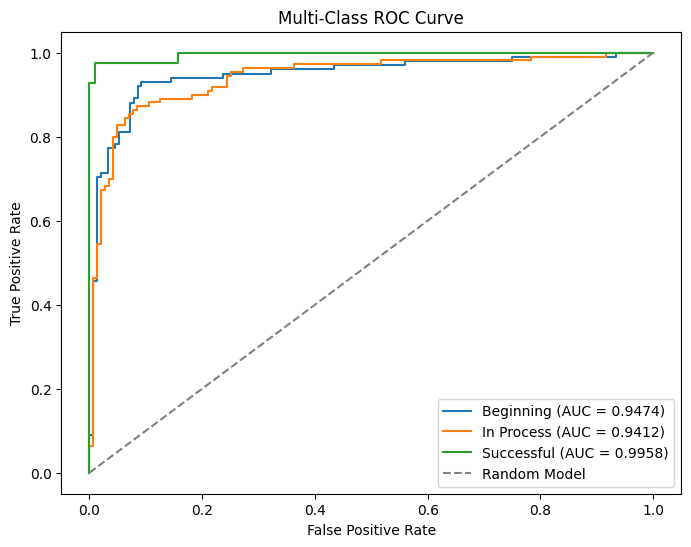

In [286]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define class name mappings
class_labels = {0: "Beginning", 1: "In Process", 2: "Successful"}

# Compute ROC curve for each class
plt.figure(figsize=(8, 6))

for i, class_label in class_labels.items():
    # Compute ROC curve and AUC for the current class
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs_multi[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], y_probs_multi[:, i])

    # Use mapped class names in the legend
    plt.plot(fpr, tpr, label=f'{class_label} (AUC = {auc_score:.4f})')

# Plot diagonal line (random model)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Model')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [287]:
translation_dict = {
    'Autoconcepto': 'Self-concept',
    'Autocuidado': 'Self-care',
    'Autoestima': 'Self-esteem',
    'Comportamiento prosocial': 'Prosocial behavior',
    'Comunicación asertiva': 'Assertive communication',
    'Conciencia emocional': 'Emotional awareness',
    'Conciencia social': 'Social awareness',
    'Empatía': 'Empathy',
    'Regulación emocional': 'Emotional regulation',
    'Resolución de conflictos': 'Conflict resolution',
    'Toma de decisiones responsables': 'Responsible decision-making',
    'Trabajo en equipo': 'Teamwork',
    'Aprendizaje completamente interiorizado': 'Completely internalized learning',
    'Comprensión comprobada y asegurada': 'Proven and assured understanding',
    'Expectativas rigurosas mantenidas': 'Maintained rigorous expectations',
    'Se crea una cultura positiva y un entorno de aprendizaje': 'Creates a positive culture and learning environment',
    'Se establece un entorno de aprendizaje atractivo': 'Establishes an engaging learning environment',
    'Se fomentan relaciones alentadoras y de apoyo': 'Encourages supportive and uplifting relationships',
    'Se valoran los aportes y las ideas de los estudiantes': "Values students' contributions and ideas"
}

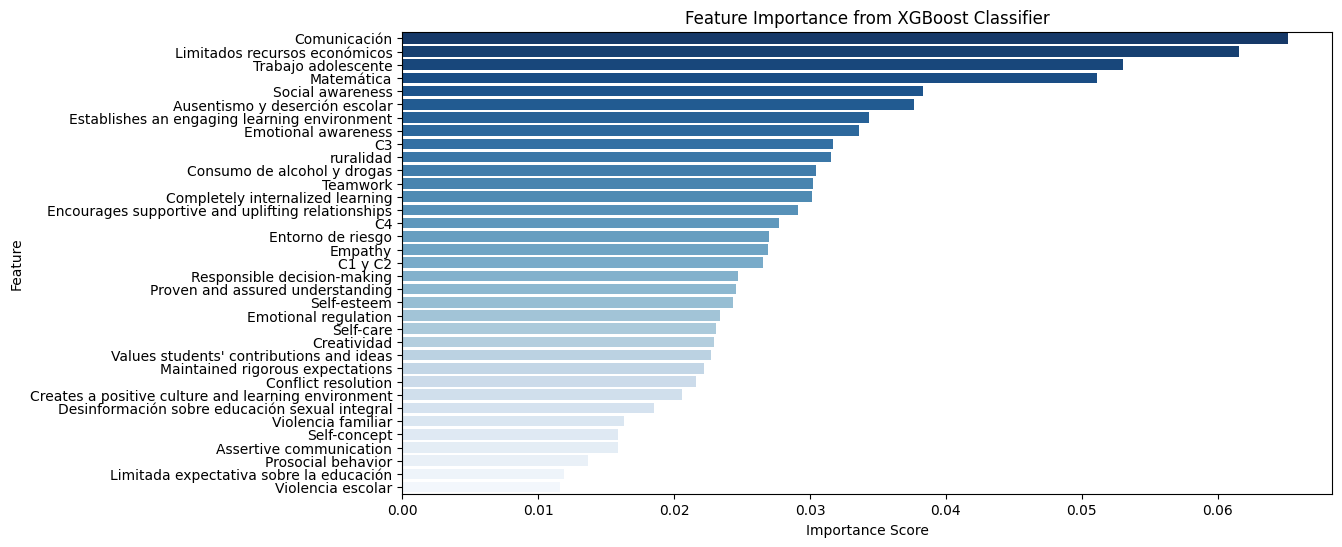

In [288]:
# Extract feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Use the feature names from your dataset
    'Importance': xgb_model.feature_importances_
})

# Sort by importance (descending)
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance['Feature'] = feature_importance['Feature'].replace(translation_dict)

# Plot Feature Importance correctly
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance['Importance'], 
            y=feature_importance['Feature'], 
            hue=feature_importance['Feature'],  # Assign hue
            palette="Blues_r", 
            legend=False)  # Disable legend

plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance from XGBoost Classifier")
plt.show()

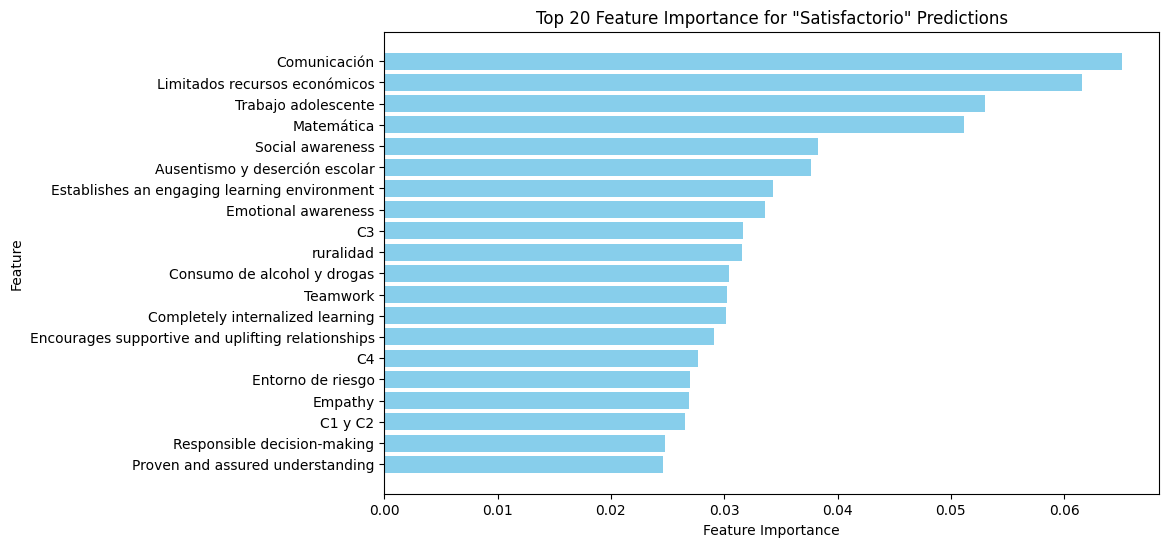

In [291]:
# Assuming xgb_model is your trained XGBoost model
# Assuming X_test and y_pred are your test features and predictions

# Step 1: Filter predictions for "Satisfactorio" (class 2)
satisfactorio_indices = np.where(y_pred == 2)[0]  # Indices where the model predicted class 2
X_satisfactorio = X_test.iloc[satisfactorio_indices]  # Filtered features for "Satisfactorio" predictions

# Step 2: Get feature importance from the model
feature_importance = xgb_model.feature_importances_  # Feature importance scores
feature_names = X_test.columns  # Feature names

# Step 3: Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df['Feature'] = importance_df['Feature'].replace(translation_dict)

# Step 4: Visualize feature importance for "Satisfactorio" predictions
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importance for "Satisfactorio" Predictions')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()